## Import the libraries:

In [234]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading DataSet:


In [235]:
df = pd.read_csv('/content/ODI_Match_info.csv')

In [236]:
df.head(10)

,season,date,team1,team2,toss_winner,toss_decision,winner,venue
0,2023/24,9/24/2023,India,Australia,Australia,field,India,"Holkar Cricket Stadium, Indore"
1,2023,9/23/2023,England,Ireland,Ireland,field,England,"Trent Bridge, Nottingham"
2,2023,9/23/2023,New Zealand,Bangladesh,New Zealand,bat,New Zealand,"Shere Bangla National Stadium, Mirpur"
3,2023/24,9/22/2023,Australia,India,India,field,India,"Punjab Cricket Association IS Bindra Stadium, ..."
4,2023,9/21/2023,New Zealand,Bangladesh,Bangladesh,field,NaN,"Shere Bangla National Stadium, Mirpur"
5,2023,9/17/2023,Sri Lanka,India,Sri Lanka,bat,India,"R Premadasa Stadium, Colombo"
6,2023/24,9/17/2023,South Africa,Australia,Australia,field,South Africa,"The Wanderers Stadium, Johannesburg"
7,2023,9/15/2023,Bangladesh,India,India,field,Bangladesh,"R Premadasa Stadium, Colombo"
8,2023,9/15/2023,England,New Zealand,England,bat,England,"Lord's, London"
9,2023/24,9/15/2023,South Africa,Australia,Australia,field,South Africa,"SuperSport Park, Centurion"


In [237]:
df.shape

(2379, 8)

In [238]:
df.describe(include='all')

,season,date,team1,team2,toss_winner,toss_decision,winner,venue
count,2379,2379,2379,2379,2379,2379,2259,2379
unique,43,2013,26,27,27,2,27,293
top,2006/07,2/4/2007,Australia,Sri Lanka,India,bat,India,Harare Sports Club
freq,131,4,254,266,243,1218,290,113


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   season         2379 non-null   object
 1   date           2379 non-null   object
 2   team1          2379 non-null   object
 3   team2          2379 non-null   object
 4   toss_winner    2379 non-null   object
 5   toss_decision  2379 non-null   object
 6   winner         2259 non-null   object
 7   venue          2379 non-null   object
dtypes: object(8)
memory usage: 148.8+ KB


In [240]:
df.isnull().sum()

,0
season,0
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
winner,120
venue,0


# Missing Values Count

In [241]:
miss_val=df.isnull().sum().sort_values(ascending=False)
miss_val=pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissValueCount'])

miss_val['Percent']=miss_val.MissValueCount.apply(lambda x:'{:.2f}'.format(float(x)/df.shape[0]*100))
miss_val=miss_val[miss_val.MissValueCount>=0]
miss_val

,MissValueCount,Percent
winner,120,5.04
season,0,0.00
date,0,0.00
team1,0,0.00
team2,0,0.00
toss_winner,0,0.00
toss_decision,0,0.00
venue,0,0.00


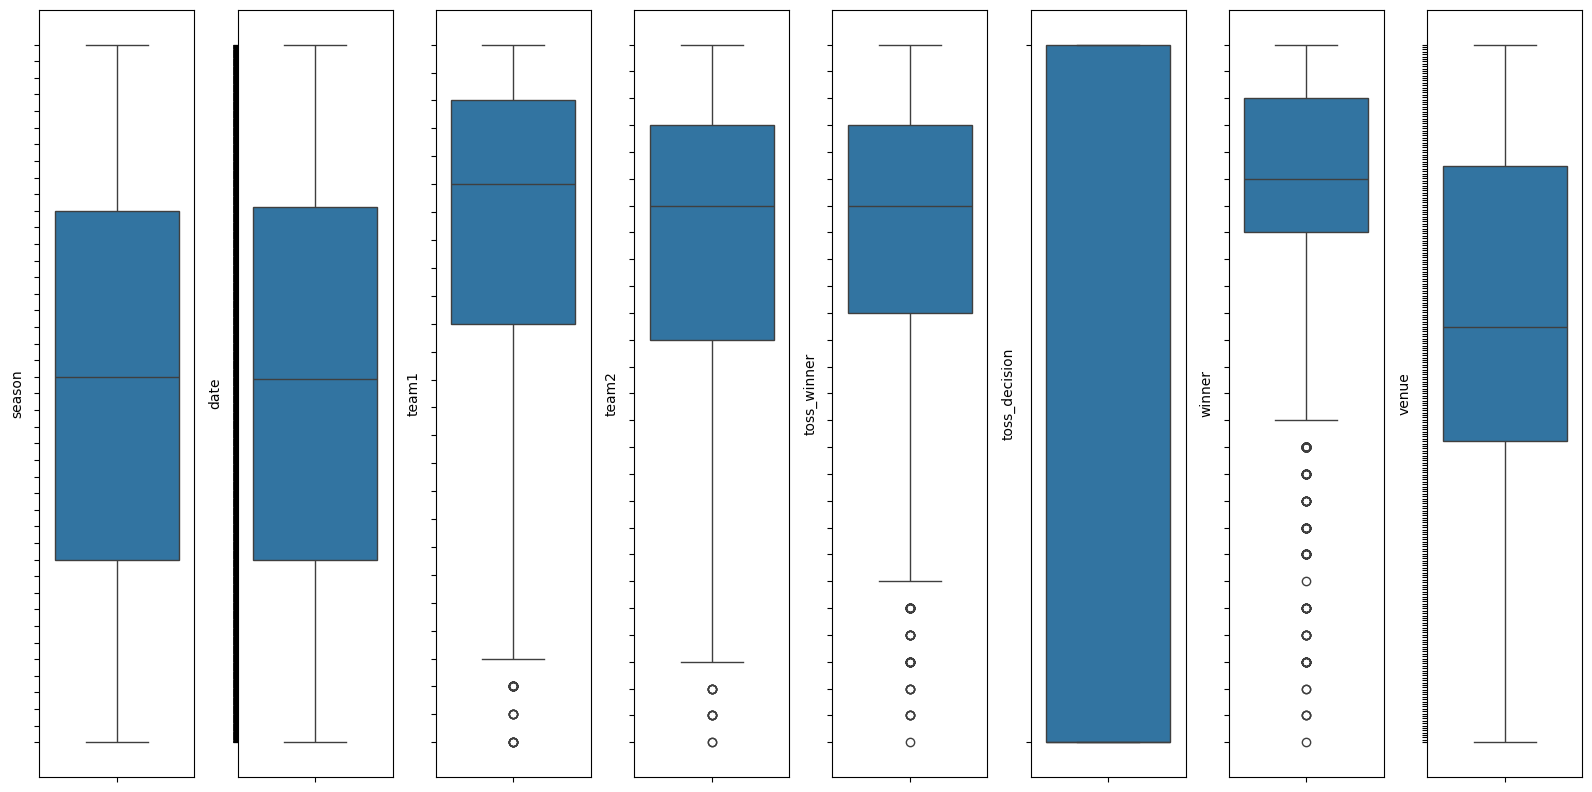

In [242]:

# Shows the Outliers subplots
fig, axs = plt.subplots(ncols=8, nrows=1, figsize=(16, 8))
axs = axs.flatten()

# Plot boxplots for each column in the dataset, remove y-axis tick labels
index = 0
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    axs[index].set_ylabel(k)  # Set y-axis label to the column name
    axs[index].set_yticklabels([])  # Remove y-axis tick labels
    index += 1

# Adjust layout to avoid overlap
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=2.5)
plt.show()


## Split the Dataset into train and test data

In [243]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Select relevant columns for input and output
features = ['team1', 'team2', 'venue']
target = 'winner'

# Encode categorical columns (team1, team2, venue, and winner)
label_encoder = LabelEncoder()
for col in features + [target]:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Split the data into input (X) and output (y)
X = df[features]
y = df[target]

In [321]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Decision Tree Model:


In [301]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=30)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=30)

In [302]:
y_pred_tree = decision_tree.predict(X_test)
print("Predicted Values:", y_pred_tree)


Predicted Values: [22 18  3 18  9  3 21 16 17 23  7  7 24 16 22 22 18 27 21  3  9 18 10  9
  9  9 16  9  3  3  3 27 22 21 10  9 16 24  9 16  9  9  7  9  9 16  9  3
  9 22 27  3  2 22 10  0 24  7 21  3 21 22 22 16  9 18  0 16 21  3 22  0
  9 21 27 18 14  0  4 21 22 25 18  3  3  3  7  9  9  7  3  7  9 18 10 24
  3  4 22 21 22 18 23  9 14  7  4  0  7 21 18  0  3 22 14  9  3  3  9 18
  9 18 20  7  7  3  7  6 22  9  9 25  7 25  3 21 21  3  7  4 10  4  3  9
 16 13  7 26  4 22 27  7 18 18 21  9 22 27 18 16  4  7 16  3 18  7  3 16
 21 27  4  9 13 13 13 25 18 26  7 22 21  4  7 10 21  4 18 24 22  7  3  9
  3 18  7 16 16  4  9 25 22 22 16 25  9 23  7 16  9 14 19 22 21  9 16  7
 22  3  7 13 10 16 26  9 16 25  2 21 18 22  3  4 18 16 24  3 18 21 16 18
  3  3  0  3  0 26 22  4  9  7 22 12 21  4  7 14 25 16  3  0 20 18 16 14
  4 27 16  3  0 25 13 25  9  9 25 20 25 25 25 18 18  3 20 21  3  3  3 23
  3  7 10 18 27  9 22 22 26 22  0 21  9  9  3 20  0 27 10  7 17 21  7 16
 22 22 21  4 16  9  3 23  4  9 26

In [303]:
# Evaluate the models using accuracy
from sklearn.metrics import accuracy_score
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_tree)

Accuracy: 0.592436974789916


### Visualization Decision Tree:


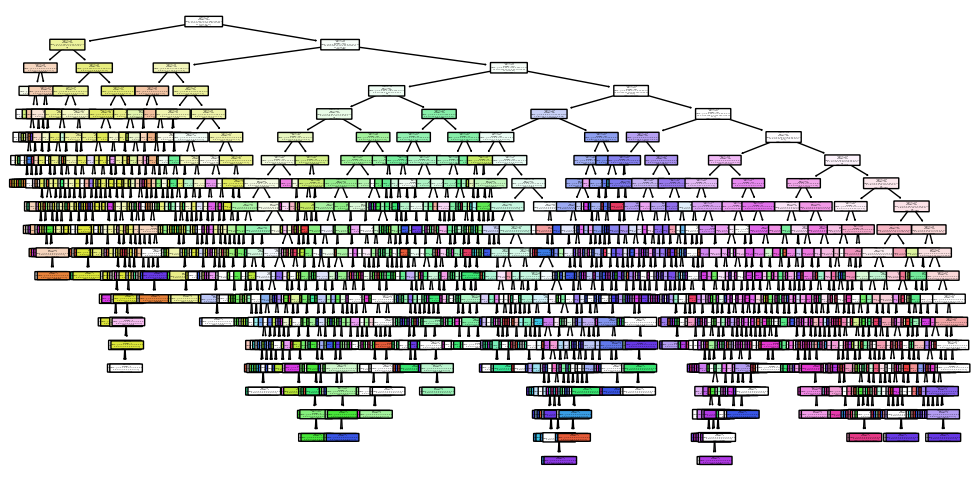

In [304]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=label_encoder.classes_, rounded=True)

plt.show()

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
# Train a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=25,criterion='entropy', random_state=30)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=30)

In [345]:
y_pred_forest = random_forest.predict(X_test)
print("Predicted Values:", y_pred_forest)

Predicted Values: [10 16  3 18  9  3 21  9 17 23  7  7 24 16 22 22 16 27 21  3  9 18 23  9
  9  9 16  9  3  3  3 10  3 21 10  9 16 24  9 16  9  7  7  9  9 16  9  3
 27 22  7  3  2 22 10  0 24  7 21  3 21 22  3 16  9 18  0 16  9  3 22  0
  9 21 18 18 14  0  4 21 22 25 18  3  3  3  7  9  9 18  3  7  9 18 23 20
  3  4 22 21 23 18  7  9 18 21  4  3  7 18 18  0  3 22 14  9  3  3  9 18
  9 18 20 22  7  3  7  9 22  9  9 25  7 25  3 21 21  3  7  4 10  4  3  9
 16 17  7 26  7 22 27  7 18  0 21  9  3 27 18 16 27  7 16  3 18 16  3 16
 21 27  4  9 13 13 13 26 18 26 10 22 21  4  7 10 21  7 18 18 27  7  3 21
 16 18  7 16 16  7  9 25 22 22 16 25  9 25  7 27  9 14 19 22 25  9 16  7
 22  3  7 18 16 16 26  9 16 25  2 21 18 22  3  4 18 16 24  3 18 21 16 18
  3  3  0  3  3 26 22  9  9  7 22 12 21  4  7 14 25 16  3  0 20 18 16 14
  4  7 16  3  0 25 18 25  9  9 25 20 25 25 25  7 21  3 20 21  3 21  3  7
  3  7 10 18 27  9 22 22 26 22  4 21  9 21  3 20  0 27 10  7 17 21  7 26
 22 22 21  4 16  9  3 24  4  9 26

In [346]:
from sklearn.metrics import accuracy_score
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy_forest)


Accuracy: 0.5777310924369747


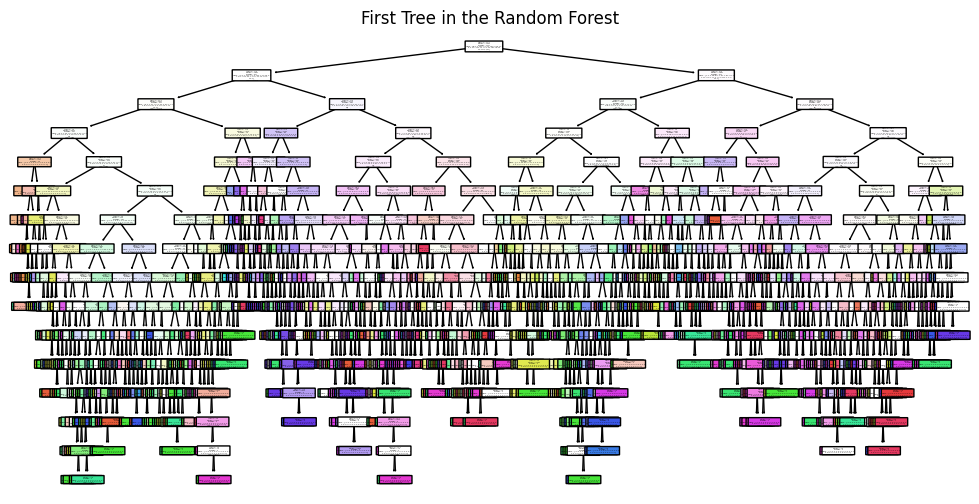

In [347]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract a single tree from the random forest
estimator = random_forest.estimators_[0]  # Index 0 for the first tree

# Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(estimator, filled=True, feature_names=X_train.columns, class_names=label_encoder.classes_, rounded=True)
plt.title("First Tree in the Random Forest")
plt.show()
